# Random Forest Model and MLP

### Import necessary modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

### Read the dataset into pandas dataframe

In [2]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,ID,0,1,2,3,4,5,6,7,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
0,0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,...,3101,3211,3097,2758,3099,2759,5753,1824,4.234863,9
1,1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,...,439,281,302,7639,518,17001,54902,8588,5.538818,2
2,2,01jsnpXSAlgw6aPeDxrU,93506,9542,2568,2438,8925,9330,9007,2342,...,2242,2885,2863,2471,2786,2680,49144,468,3.887939,9
3,3,01kcPWA9K2BOxQeS5Rju,21091,1213,726,817,1257,625,550,523,...,485,462,516,1133,471,761,7998,13940,0.574219,1
4,4,01SuzwMJEIXsK7A8dQbl,19764,710,302,433,559,410,262,249,...,350,209,239,653,221,242,2199,9008,0.370850,8


In [3]:
# Rename the column Unnamed: 0 to Indices
# Set Indices as the index of the dataframe
df.rename(columns = {'Unnamed: 0': 'Indices'}, inplace = True)
df.set_index('Indices', inplace = True)
df.head()

,ID,0,1,2,3,4,5,6,7,8,...,f9,fa,fb,fc,fd,fe,ff,??,size,Class
Indices,,,,,,,,,,,,,,,,,,,,,
0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,2965,...,3101,3211,3097,2758,3099,2759,5753,1824,4.234863,9
1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,9291,...,439,281,302,7639,518,17001,54902,8588,5.538818,2
2,01jsnpXSAlgw6aPeDxrU,93506,9542,2568,2438,8925,9330,9007,2342,9107,...,2242,2885,2863,2471,2786,2680,49144,468,3.887939,9
3,01kcPWA9K2BOxQeS5Rju,21091,1213,726,817,1257,625,550,523,1078,...,485,462,516,1133,471,761,7998,13940,0.574219,1
4,01SuzwMJEIXsK7A8dQbl,19764,710,302,433,559,410,262,249,422,...,350,209,239,653,221,242,2199,9008,0.370850,8


In [4]:
# check the shape of the dataframe
df.shape

(10868, 260)

In [5]:
# rename the column '??' to Corrupted
df.rename(columns = {'??': 'Corrupted'}, inplace = True)
df.head()

,ID,0,1,2,3,4,5,6,7,8,...,f9,fa,fb,fc,fd,fe,ff,Corrupted,size,Class
Indices,,,,,,,,,,,,,,,,,,,,,
0,01azqd4InC7m9JpocGv5,601905,3905,2816,3832,3345,3242,3650,3201,2965,...,3101,3211,3097,2758,3099,2759,5753,1824,4.234863,9
1,01IsoiSMh5gxyDYTl4CB,39755,8337,7249,7186,8663,6844,8420,7589,9291,...,439,281,302,7639,518,17001,54902,8588,5.538818,2
2,01jsnpXSAlgw6aPeDxrU,93506,9542,2568,2438,8925,9330,9007,2342,9107,...,2242,2885,2863,2471,2786,2680,49144,468,3.887939,9
3,01kcPWA9K2BOxQeS5Rju,21091,1213,726,817,1257,625,550,523,1078,...,485,462,516,1133,471,761,7998,13940,0.574219,1
4,01SuzwMJEIXsK7A8dQbl,19764,710,302,433,559,410,262,249,422,...,350,209,239,653,221,242,2199,9008,0.370850,8


In [6]:
# basic description about the dataset
pd.set_option('display.max_rows', 260)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,10868.0,54126.323887,101169.594583,0.000000,11257.000000,21820.000000,6.079300e+04,2.290304e+06
1,10868.0,8076.913876,19019.471235,0.000000,1140.000000,4211.000000,7.313250e+03,7.103110e+05
2,10868.0,10024.820482,50785.012035,0.000000,657.000000,3053.500000,3.901500e+03,1.797398e+06
3,10868.0,7096.159183,28366.187957,0.000000,691.000000,3075.000000,3.662000e+03,1.853743e+06
4,10868.0,8952.651270,55466.381224,0.000000,896.750000,3139.000000,4.291750e+03,1.633527e+06
5,10868.0,4358.067078,25423.802136,0.000000,556.000000,2539.000000,3.335000e+03,1.766915e+06
6,10868.0,7718.305484,53221.953718,0.000000,439.000000,2729.000000,3.309000e+03,1.773856e+06
7,10868.0,3839.658355,16554.961832,0.000000,484.000000,2399.500000,3.295000e+03,1.086639e+06
8,10868.0,5029.475156,19702.692390,0.000000,816.500000,3169.500000,4.697750e+03,1.123828e+06
9,10868.0,3035.935959,16328.384488,0.000000,338.000000,947.000000,3.188000e+03,9.077620e+05


In [7]:
# Check the null values in the dataset
df.isnull().sum()

ID           0
0            0
1            0
2            0
3            0
4            0
5            0
6            0
7            0
8            0
9            0
0a           0
0b           0
0c           0
0d           0
0e           0
0f           0
10           0
11           0
12           0
13           0
14           0
15           0
16           0
17           0
18           0
19           0
1a           0
1b           0
1c           0
1d           0
1e           0
1f           0
20           0
21           0
22           0
23           0
24           0
25           0
26           0
27           0
28           0
29           0
2a           0
2b           0
2c           0
2d           0
2e           0
2f           0
30           0
31           0
32           0
33           0
34           0
35           0
36           0
37           0
38           0
39           0
3a           0
3b           0
3c           0
3d           0
3e           0
3f           0
40           0
41        

In [8]:
# Check the data type of each column
df.dtypes

ID            object
0              int64
1              int64
2              int64
3              int64
4              int64
5              int64
6              int64
7              int64
8              int64
9              int64
0a             int64
0b             int64
0c             int64
0d             int64
0e             int64
0f             int64
10             int64
11             int64
12             int64
13             int64
14             int64
15             int64
16             int64
17             int64
18             int64
19             int64
1a             int64
1b             int64
1c             int64
1d             int64
1e             int64
1f             int64
20             int64
21             int64
22             int64
23             int64
24             int64
25             int64
26             int64
27             int64
28             int64
29             int64
2a             int64
2b             int64
2c             int64
2d             int64
2e           

- There are **no missing values** in the dataset.
- Datatype of all the columns is **int64** except the column size which is **float64**.

In [9]:
# Unique values in the dataset in each column
df.nunique()

ID           10868
0             8881
1             5535
2             4844
3             4848
4             5051
5             4355
6             4295
7             4248
8             4989
9             3094
0a            3061
0b            4051
0c            4453
0d            3201
0e            2872
0f            4658
10            5115
11            3596
12            3558
13            3447
14            4308
15            3274
16            2939
17            2831
18            4258
19            2859
1a            2777
1b            2790
1c            3122
1d            2804
1e            2829
1f            2900
20            4857
21            3127
22            3179
23            3247
24            4635
25            2740
26            2535
27            2521
28            2819
29            2586
2a            2539
2b            2811
2c            2763
2d            2586
2e            2576
2f            2625
30            3548
31            3281
32            3230
33          

### Explore the dataset

In [10]:
# print the most frequent value counts in each column in the dataset
for i in range(1, df.shape[1]):
    print("Top 15 Value counts of column {}: ".format(i))
    print(df.iloc[:, i].value_counts().iloc[:15])
    print('----------------------')

Top 15 Value counts of column 1: 
11449    10
0         9
11344     9
11408     8
10543     8
11410     8
25226     7
11422     7
11365     7
11337     7
11393     7
11403     7
11335     7
19812     7
11396     6
Name: 0, dtype: int64
----------------------
Top 15 Value counts of column 2: 
702     23
698     21
690     21
714     20
699     20
5572    19
5486    19
5545    19
5560    19
709     18
5552    18
704     18
5513    18
5556    18
5527    18
Name: 1, dtype: int64
----------------------
Top 15 Value counts of column 3: 
3210    24
747     24
34      22
33      22
3241    21
3211    21
30      21
28      21
35      21
278     21
3250    20
3178    20
29      20
3252    19
748     19
Name: 2, dtype: int64
----------------------
Top 15 Value counts of column 4: 
33      20
3298    20
444     20
30      20
3341    19
3323    19
3320    18
3362    17
3378    17
3334    17
3300    17
35      17
3292    17
3278    17
3305    16
Name: 3, dtype: int64
----------------------
Top 15 Va

Name: 83, dtype: int64
----------------------
Top 15 Value counts of column 133: 
3       25
4       25
8       25
9       24
3220    24
3219    23
430     22
3249    22
3190    21
3193    20
3235    20
3236    20
189     19
3228    19
11      19
Name: 84, dtype: int64
----------------------
Top 15 Value counts of column 134: 
12      31
9       31
14      30
13      29
11      26
10      25
8       24
3294    20
3297    20
3208    19
3281    19
15      19
3221    19
3248    19
17      18
Name: 85, dtype: int64
----------------------
Top 15 Value counts of column 135: 
96     40
8      37
6      36
97     35
95     34
7      33
9      27
320    26
10     25
308    25
93     25
243    24
90     24
334    23
11     23
Name: 86, dtype: int64
----------------------
Top 15 Value counts of column 136: 
298    34
6      34
7      31
8      30
78     29
79     28
4      27
3      26
75     26
268    26
5      25
304    25
293    24
297    23
300    22
Name: 87, dtype: int64
-------------------

In [11]:
# print the most frequent value counts in each column in the dataset
for i in range(1, df.shape[1]):
    print("Last 15 Value counts of column {}: ".format(i))
    print(df.iloc[:, i].value_counts().iloc[-15:])
    print('----------------------')

Last 15 Value counts of column 1: 
4447      1
10568     1
46130     1
14666     1
64296     1
10576     1
63826     1
61779     1
772436    1
6486      1
135658    1
270681    1
36292     1
6494      1
11070     1
Name: 0, dtype: int64
----------------------
Last 15 Value counts of column 2: 
7866     1
1724     1
22198    1
1716     1
22190    1
67244    1
2880     1
9896     1
3749     1
26272    1
9880     1
22166    1
9872     1
1676     1
7639     1
Name: 1, dtype: int64
----------------------
Last 15 Value counts of column 3: 
8780     1
25338    1
11003    1
11374    1
83051    1
21244    1
19642    1
9311     1
774      1
2823     1
11350    1
15444    1
1107     1
35855    1
1963     1
Name: 2, dtype: int64
----------------------
Last 15 Value counts of column 4: 
2375     1
29000    1
334      1
1067     1
8570     1
12624    1
7208     1
10579    1
23584    1
1051     1
35159    1
1043     1
10611    1
6517     1
2047     1
Name: 3, dtype: int64
----------------------
Last 

7367     1
1220     1
5302     1
17580    1
9384     1
17671    1
7327     1
1180     1
7319     1
1172     1
9360     1
7311     1
9915     1
1164     1
2047     1
Name: 7d, dtype: int64
----------------------
Last 15 Value counts of column 127: 
1442     1
3491     1
1474     1
1498     1
5600     1
846      1
1522     1
3571     1
2871     1
2863     1
1570     1
1578     1
1610     1
89705    1
3986     1
Name: 7e, dtype: int64
----------------------
Last 15 Value counts of column 128: 
38      1
6165    1
2063    1
1242    1
3430    1
6149    1
1258    1
6135    1
6127    1
1290    1
6119    1
6111    1
2013    1
1314    1
2047    1
Name: 7f, dtype: int64
----------------------
Last 15 Value counts of column 129: 
1220     1
1204     1
1196     1
1188     1
1164     1
13450    1
11401    1
7303     1
7295     1
11377    1
5214     1
7255     1
1108     1
1100     1
4082     1
Name: 80, dtype: int64
----------------------
Last 15 Value counts of column 130: 
2940      1
4488      1

- Value counts are very different in each column
- All columns have few very large counts 

### Plot the distribution of classes in the dataset

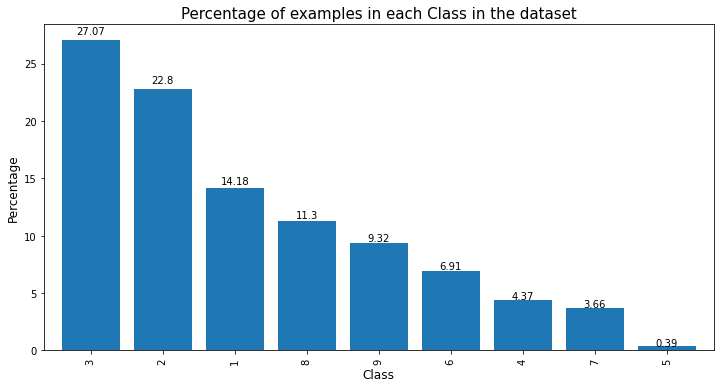

In [12]:
Class_counts = 100 * df.Class.value_counts() / len(df)
ax = Class_counts.plot(kind = 'bar', figsize = (12, 6), width = 0.8)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{round(height, 2)}', (x + width / 2, y + height * 1.02), ha = 'center')

ax.set_title('Percentage of examples in each Class in the dataset', fontsize = 15)
ax.set_ylabel('Percentage', fontsize = 12)
ax.set_xlabel('Class', fontsize = 12);

In [13]:
Class_counts

3    27.070298
2    22.800883
1    14.179242
8    11.299227
9     9.320942
6     6.910195
4     4.370629
7     3.662127
5     0.386456
Name: Class, dtype: float64

- As can be seen from the above bar graph, classes are highly imbalanced
- **Class 3 has 27% examples** while **class 5 has only 0.39% examples**

### Explore the size column in the dataset

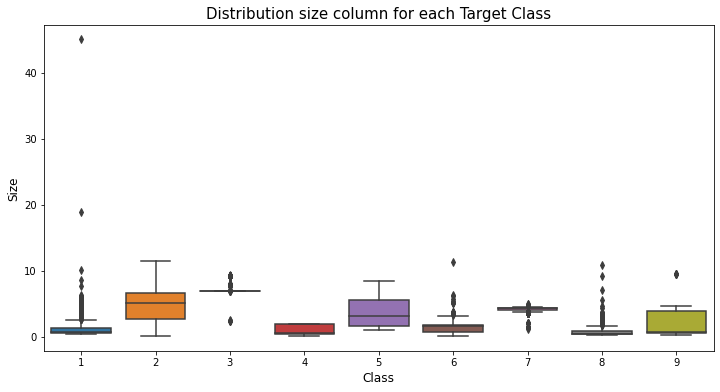

In [14]:
fig, ax = plt.subplots(figsize = (12, 6))
sns.boxplot(x = 'Class', y = 'size', data = df, ax = ax)
ax.set_title('Distribution size column for each Target Class', fontsize = 15)
ax.set_xlabel('Class', fontsize = 12)
ax.set_ylabel('Size', fontsize = 12);

- As can be seen from the box plot above, size is different for each class.
- **Class 2 and Class 5** do not have outliers in the size feature.
- Outliers are present in other classes.

### Train, Validation and Test Data 

In [15]:
targets = df.Class.values
df.drop(['ID', 'Class'], axis = 1, inplace = True)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,f8,f9,fa,fb,fc,fd,fe,ff,Corrupted,size
Indices,,,,,,,,,,,,,,,,,,,,,
0,601905,3905,2816,3832,3345,3242,3650,3201,2965,3205,...,3687,3101,3211,3097,2758,3099,2759,5753,1824,4.234863
1,39755,8337,7249,7186,8663,6844,8420,7589,9291,358,...,6536,439,281,302,7639,518,17001,54902,8588,5.538818
2,93506,9542,2568,2438,8925,9330,9007,2342,9107,2457,...,2358,2242,2885,2863,2471,2786,2680,49144,468,3.887939
3,21091,1213,726,817,1257,625,550,523,1078,473,...,873,485,462,516,1133,471,761,7998,13940,0.574219
4,19764,710,302,433,559,410,262,249,422,223,...,947,350,209,239,653,221,242,2199,9008,0.370850


In [50]:
X, test_x, Y, test_y = train_test_split(df, targets, test_size = 0.1, stratify = targets, random_state = 42)
train_x, val_x, train_y, val_y = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 42)
print(f"Train_x shape: {train_x.shape}\nTrain_y shape: {train_y.shape}")
print(f"Test_x shape: {test_x.shape}\nTest_y shape: {test_y.shape}")
print(f"Val_x shape: {val_x.shape}\nVal_y shape: {val_y.shape}")

Train_x shape: (7824, 258)
Train_y shape: (7824,)
Test_x shape: (1087, 258)
Test_y shape: (1087,)
Val_x shape: (1957, 258)
Val_y shape: (1957,)


### Base Line Logistic Regression Model

In [22]:
# base line logistic regression model for classification 
model = LogisticRegression(class_weight = 'balanced', max_iter = 5000, random_state = 42, n_jobs = -1)
model.fit(train_x, train_y)
prediction = model.predict(val_x)
confusion_matrix(val_y, prediction)

array([[249,  10,   1,   0,   0,   6,   0,   8,   4],
       [ 20, 357,   2,  11,   4,  16,   5,  14,  17],
       [  0,   0, 526,   3,   1,   0,   0,   0,   0],
       [  0,   0,   1,  82,   0,   2,   0,   0,   0],
       [  0,   0,   0,   0,   6,   0,   1,   0,   1],
       [  1,   0,   0,   3,   0, 128,   0,   3,   0],
       [  2,   2,   1,   2,   3,   1,  61,   0,   0],
       [ 10,   1,   0,   4,   3,   5,   1, 196,   1],
       [  1,   2,   0,   2,   0,   0,   5,   4, 168]], dtype=int64)

In [23]:
print(f"Accuracy of baseline model: {accuracy_score(val_y, prediction)}")

Accuracy of baseline model: 0.9059785385794583


In [24]:
print(f"F1_score of baseline model: {f1_score(val_y, prediction, average = None)}")

F1_score of baseline model: [0.88770053 0.87286064 0.99151744 0.85416667 0.48       0.87372014
 0.84137931 0.87892377 0.90080429]


### Baseline Random Forest Model

In [37]:
rnd_forest = RandomForestClassifier(class_weight = 'balanced', n_jobs = -1, random_state = 42)
rnd_forest.fit(train_x, train_y)
prediction = rnd_forest.predict(val_x)
confusion_matrix(val_y, prediction)

array([[276,   0,   0,   0,   0,   1,   0,   1,   0],
       [  0, 446,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 530,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,  83,   0,   0,   0,   1,   0],
       [  1,   0,   0,   0,   6,   0,   0,   1,   0],
       [  1,   0,   0,   3,   1, 127,   0,   3,   0],
       [  0,   0,   0,   0,   0,   1,  71,   0,   0],
       [  8,   0,   0,   0,   0,   3,   1, 208,   1],
       [  1,   0,   2,   0,   0,   2,   0,   0, 177]], dtype=int64)

In [38]:
print(f"Accuracy of Random Forest baseline model: {accuracy_score(val_y, prediction)}")

Accuracy of Random Forest baseline model: 0.9831374552887072


In [39]:
print(f"F1_score of baseline model: {f1_score(val_y, prediction, average = None)}")

F1_score of baseline model: [0.97526502 1.         0.99811676 0.97076023 0.8        0.94423792
 0.98611111 0.95632184 0.98333333]


### Tweaking parameters of Random Forests Model

In [42]:
best_rf_model = RandomForestClassifier(n_estimators = 400, min_samples_leaf = 1, min_samples_split = 2, max_depth = 16)
best_rf_model.fit(train_x, train_y)
prediction = best_rf_model.predict(val_x)
confusion_matrix(val_y, prediction)

array([[275,   0,   0,   0,   0,   2,   0,   1,   0],
       [  0, 446,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 530,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  83,   0,   0,   0,   2,   0],
       [  0,   0,   0,   0,   7,   0,   0,   1,   0],
       [  1,   0,   0,   3,   1, 127,   0,   3,   0],
       [  0,   0,   0,   0,   0,   4,  68,   0,   0],
       [ 10,   1,   0,   1,   1,   3,   0, 203,   2],
       [  1,   0,   2,   0,   0,   1,   0,   0, 178]], dtype=int64)

In [43]:
print(f"F1_score of best_rf_model on validation data: {f1_score(val_y, prediction, average = None)}")

F1_score of best_rf_model on validation data: [0.97345133 0.99888018 0.99811676 0.96511628 0.82352941 0.93382353
 0.97142857 0.94199536 0.98342541]


### Test data predictions with best random forest model

In [44]:
test_pred = best_rf_model.predict(test_x)
confusion_matrix(test_y, test_pred)

array([[152,   0,   0,   1,   0,   0,   0,   0,   1],
       [  0, 246,   0,   0,   0,   0,   0,   2,   0],
       [  0,   0, 294,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  47,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   3,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,  74,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,  40,   0,   0],
       [  5,   0,   0,   0,   0,   4,   0, 114,   0],
       [  0,   0,   2,   1,   0,   0,   0,   1,  97]], dtype=int64)

In [46]:
print(f"F1_score of best_rf_model on test data: {f1_score(test_y, test_pred, average = None)}")

F1_score of best_rf_model on test data: [0.97749196 0.99595142 0.99661017 0.96907216 0.85714286 0.96103896
 1.         0.94214876 0.97487437]


In [47]:
print(f"Accuracy of best_rf_model on test data: {accuracy_score(test_y, test_pred)}")

Accuracy of best_rf_model on test data: 0.9816007359705612


### Base Line MLP model

In [48]:
mlp = MLPClassifier()
mlp.fit(train_x, train_y)
prediction = mlp.predict(val_x)
confusion_matrix(val_y, prediction)

array([[110,  18,   0,   1,   0,  42,   4,  96,   7],
       [  1, 425,   3,   1,   0,   3,   1,   9,   3],
       [  0,   0, 530,   0,   0,   0,   0,   0,   0],
       [  0,   0,  29,  54,   0,   1,   1,   0,   0],
       [  0,   0,   4,   2,   0,   1,   1,   0,   0],
       [  0,   0,   6,   8,   0, 102,   6,  10,   3],
       [  0,   0,   3,   0,   0,   1,  67,   1,   0],
       [  0,   1,   7,   3,   0,   3,   0, 207,   0],
       [  0,   4,   0,   1,   0,   2,   0,   3, 172]], dtype=int64)

In [49]:
print(f"Accuracy of baseline mlp model: {accuracy_score(val_y, prediction)}")

Accuracy of baseline mlp model: 0.8518140010219724


In [50]:
print(f"F1_score of baseline mlp model: {f1_score(val_y, prediction, average = None)}")

F1_score of baseline mlp model: [0.5655527  0.950783   0.95323741 0.69677419 0.         0.70344828
 0.88157895 0.75685558 0.9373297 ]


### Input data preprocessing for mlp model

In [59]:
# scale the input data
scalar = MinMaxScaler()
scaled_train_x = scalar.fit_transform(train_x)
scaled_valid_x = scalar.transform(val_x)
scaled_test_x = scalar.transform(test_x)

### MLP with two hidden layers

In [56]:
mlp = MLPClassifier(hidden_layer_sizes = (128, 64), max_iter = 500)
mlp.fit(scaled_train_x, train_y)
prediction = mlp.predict(scaled_valid_x)
confusion_matrix(val_y, prediction)

array([[268,   0,   0,   0,   0,   3,   0,   5,   2],
       [  5, 419,   0,   0,   0,   4,   0,  11,   7],
       [  0,   0, 530,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  82,   0,   1,   0,   1,   1],
       [  0,   0,   0,   0,   7,   0,   0,   0,   1],
       [  0,   0,   0,   2,   0, 131,   0,   2,   0],
       [  0,   3,   0,   0,   0,   0,  68,   0,   1],
       [  7,   1,   0,   0,   1,   3,   1, 206,   2],
       [  2,   2,   0,   0,   0,   1,   0,   2, 175]], dtype=int64)

In [57]:
print(f"F1_score of mlp model with two hidden layers: {f1_score(val_y, prediction, average = None)}")

F1_score of mlp model with two hidden layers: [0.95714286 0.96211251 1.         0.9704142  0.875      0.94244604
 0.96453901 0.91964286 0.94339623]


### Test data prediction with mlp

In [58]:
test_pred = mlp.predict(scaled_test_x)
confusion_matrix(test_y, test_pred)

array([[147,   1,   0,   0,   0,   2,   0,   3,   1],
       [  8, 227,   0,   0,   0,   3,   2,   4,   4],
       [  0,   0, 294,   0,   0,   0,   0,   0,   0],
       [  1,   0,   0,  46,   0,   1,   0,   0,   0],
       [  0,   0,   0,   0,   3,   0,   0,   1,   0],
       [  0,   0,   0,   0,   0,  74,   0,   1,   0],
       [  0,   0,   0,   0,   0,   0,  40,   0,   0],
       [  0,   0,   0,   0,   0,   3,   0, 120,   0],
       [  4,   3,   1,   0,   0,   0,   0,   1,  92]], dtype=int64)

In [59]:
print(f"F1_score of mlp model on test data: {f1_score(test_y, test_pred, average = None)}")

F1_score of mlp model on test data: [0.93630573 0.94780793 0.99830221 0.9787234  0.85714286 0.93670886
 0.97560976 0.9486166  0.92929293]


In [60]:
print(f"Accuracy of mlp model on test data: {accuracy_score(test_y, test_pred)}")

Accuracy of mlp model on test data: 0.9595216191352346


### Dimensionality reduction using PCA

In [73]:
# data scaling
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(train_x)
scaled_x_valid = scaler.transform(val_x)
scaled_x_test = scaler.transform(test_x)

In [77]:
pca = PCA().fit(scaled_x_train)

# set printing options
np.set_printoptions(suppress = True)

# Check the percentage of variance explained by each of the selected components
pca.explained_variance_ratio_

array([0.09938471, 0.02226056, 0.01605699, 0.01069837, 0.01005989,
       0.00985983, 0.00954953, 0.00945264, 0.00921384, 0.00904826,
       0.00890158, 0.0087647 , 0.00862647, 0.0085823 , 0.00831108,
       0.00828673, 0.0080336 , 0.00796373, 0.00784555, 0.0077496 ,
       0.00766789, 0.00763542, 0.00754585, 0.00747006, 0.00737409,
       0.00721373, 0.00716353, 0.00703623, 0.00700613, 0.00686605,
       0.00682265, 0.00663117, 0.0065991 , 0.00657889, 0.00644312,
       0.00642575, 0.00638881, 0.0063222 , 0.00628515, 0.00619125,
       0.00608624, 0.00603702, 0.00599671, 0.00593242, 0.00587989,
       0.00582716, 0.00579975, 0.00570464, 0.00563402, 0.00560998,
       0.0055437 , 0.00544485, 0.00540268, 0.00539034, 0.00535708,
       0.0052996 , 0.00525676, 0.00520979, 0.00519338, 0.00512451,
       0.00506327, 0.00504472, 0.00493268, 0.0049153 , 0.00483986,
       0.00483126, 0.00480126, 0.00475281, 0.00466775, 0.00464645,
       0.00463405, 0.0045943 , 0.00456213, 0.00452049, 0.00449

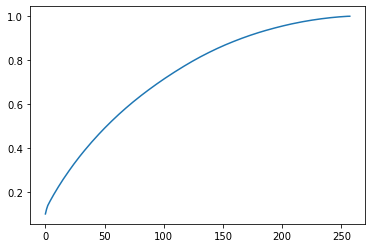

In [78]:
# plot the percentage of variance explained by each of the selected components
plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [79]:
# Let's check the amount of variance explained by each of the selected components.
pca.explained_variance_

array([25.64453358,  5.74395779,  4.1432329 ,  2.76053332,  2.59578289,
        2.5441609 ,  2.46409249,  2.43909304,  2.37747426,  2.33474942,
        2.29690158,  2.2615806 ,  2.22591306,  2.21451657,  2.14453151,
        2.138249  ,  2.07293368,  2.05490473,  2.02441193,  1.99965204,
        1.97856831,  1.97019004,  1.94707782,  1.92752135,  1.90275903,
        1.86137925,  1.84842704,  1.81557832,  1.80781196,  1.77166787,
        1.76046758,  1.71105927,  1.70278665,  1.69757121,  1.66253654,
        1.65805518,  1.64852391,  1.63133663,  1.62177645,  1.5975462 ,
        1.57045064,  1.55775048,  1.54734983,  1.53076104,  1.51720523,
        1.50359878,  1.49652693,  1.47198593,  1.45376284,  1.4475587 ,
        1.43045731,  1.40495058,  1.39406941,  1.3908854 ,  1.38230332,
        1.36747156,  1.35641728,  1.34429694,  1.34006365,  1.32229274,
        1.30648959,  1.30170468,  1.27279512,  1.2683098 ,  1.24884255,
        1.24662557,  1.23888461,  1.22638263,  1.20443443,  1.19

### Selecting the components
- Let's select the **first 93 components** as the amount of variance explained by each of them is **greater than 1**.

In [80]:
# transform the data into principal components
pca_comp = pca.transform(scaled_x_train)

# Check the shape
pca_comp.shape

(7824, 258)

In [81]:
# Select first 93 components
proj_data_train = pca_comp[:, 0:93]
proj_data_train.shape

(7824, 93)

### Transform test and validation

In [82]:
# validation input data
pca_comp = pca.transform(scaled_x_valid)
proj_data_val = pca_comp[:, 0:93]
proj_data_val.shape

(1957, 93)

In [83]:
# test data
pca_comp = pca.transform(scaled_x_test)
proj_data_test = pca_comp[:, 0:93]
proj_data_test.shape

(1087, 93)

### Random Forest model performance after PCA

In [93]:
model = RandomForestClassifier(n_estimators = 400, min_samples_leaf = 1, min_samples_split = 2, max_depth = 16)
model.fit(proj_data_train, train_y)
prediction = model.predict(proj_data_val)
confusion_matrix(val_y, prediction)

array([[269,   6,   0,   0,   0,   2,   0,   0,   1],
       [  3, 443,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0, 530,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  83,   0,   2,   0,   0,   0],
       [  1,   0,   0,   0,   6,   1,   0,   0,   0],
       [  1,   0,   0,   3,   0, 130,   0,   1,   0],
       [  0,  10,   0,   0,   0,   2,  59,   0,   1],
       [ 13,   2,   1,   0,   0,   2,   0, 200,   3],
       [  2,  23,   0,   0,   0,   1,   0,   1, 155]], dtype=int64)

In [94]:
print(f"Accuracy: {accuracy_score(val_y, prediction)}")

Accuracy: 0.9580991313234543


In [95]:
print(f"F1_score of model on validation data: {f1_score(val_y, prediction, average = None)}")

F1_score of model on validation data: [0.94885362 0.95268817 0.99905749 0.97076023 0.85714286 0.94545455
 0.90076336 0.94562648 0.90643275]


### Performance of random forest on test data after PCA

In [97]:
test_pred = model.predict(proj_data_test)
confusion_matrix(test_y, test_pred)

array([[147,   3,   0,   1,   0,   1,   0,   0,   2],
       [  0, 247,   0,   0,   0,   1,   0,   0,   0],
       [  0,   0, 294,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  46,   0,   0,   0,   0,   2],
       [  0,   0,   0,   0,   3,   0,   0,   1,   0],
       [  1,   1,   0,   1,   0,  70,   0,   2,   0],
       [  0,   5,   0,   0,   0,   1,  34,   0,   0],
       [  3,   1,   0,   0,   0,   2,   0, 116,   1],
       [  2,  21,   0,   0,   0,   0,   0,   0,  78]], dtype=int64)

In [98]:
print(f"F1_score of model on test data: {f1_score(test_y, test_pred, average = None)}")

F1_score of model on test data: [0.95765472 0.9391635  1.         0.95833333 0.85714286 0.93333333
 0.91891892 0.95867769 0.84782609]


In [99]:
print(f"Accuracy: {accuracy_score(test_y, test_pred)}")

Accuracy: 0.952161913523459


### MLP model performance after PCA

In [101]:
mlp = MLPClassifier(hidden_layer_sizes = (128, 64), max_iter = 500)
mlp.fit(proj_data_train, train_y)
prediction = mlp.predict(proj_data_val)
confusion_matrix(val_y, prediction)

array([[264,   2,   0,   1,   0,   1,   0,   9,   1],
       [  2, 435,   0,   0,   0,   0,   0,   7,   2],
       [  0,   0, 530,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  83,   0,   2,   0,   0,   0],
       [  0,   0,   0,   0,   7,   0,   0,   0,   1],
       [  0,   1,   0,   3,   1, 128,   0,   1,   1],
       [  0,   1,   0,   0,   0,   0,  70,   0,   1],
       [  1,   1,   0,   0,   0,   3,   1, 212,   3],
       [  3,   6,   2,   1,   0,   2,   0,   1, 167]], dtype=int64)

In [102]:
print(f"Accuracy: {accuracy_score(val_y, prediction)}")

Accuracy: 0.968829841594277


In [103]:
print(f"F1_score of model on validation data: {f1_score(val_y, prediction, average = None)}")

F1_score of model on validation data: [0.96350365 0.97533632 0.99811676 0.95953757 0.875      0.94464945
 0.97902098 0.94013304 0.93296089]


### Performance of mlp on test data after PCA

In [104]:
test_pred = mlp.predict(proj_data_test)
confusion_matrix(test_y, test_pred)

array([[146,   0,   0,   1,   0,   1,   0,   4,   2],
       [  4, 235,   0,   0,   1,   1,   0,   2,   5],
       [  0,   0, 294,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  46,   0,   1,   0,   0,   1],
       [  0,   0,   0,   0,   3,   0,   0,   1,   0],
       [  2,   0,   0,   1,   0,  72,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  40,   0,   0],
       [  0,   1,   0,   0,   0,   2,   0, 120,   0],
       [  1,   7,   1,   2,   0,   0,   0,   1,  89]], dtype=int64)

In [106]:
print(f"Accuracy: {accuracy_score(test_y, test_pred)}")

Accuracy: 0.9613615455381784


In [107]:
print(f"F1_score of model on test data: {f1_score(test_y, test_pred, average = None)}")

F1_score of model on test data: [0.95114007 0.95723014 0.99830221 0.93877551 0.75       0.94736842
 1.         0.9561753  0.8989899 ]


# Conclusion

## Random Forest Model before applying PCA
- F1_score of tuned random forest model on test data: **[0.97749196, 0.99595142, 0.99661017, 0.96907216, 0.85714286, 0.96103896, 1, 0.94214876, 0.97487437]**.
- Accuracy on test data: 0.9816

## Random Forest Model after applying PCA
- F1_score of model on test data: **[0.95765472, 0.9391635, 1, 0.95833333, 0.85714286, 0.93333333, 0.91891892, 0.95867769, 0.84782609]**.
- Accuracy on test data: 0.9581

## MLP before applying PCA
- F1_score of tuned mlp model on test data: **F1_score of mlp model with two hidden layers: [0.95714286, 0.96211251, 1, 0.9704142, 0.875, 0.94244604, 0.96453901, 0.91964286, 0.94339623]**.
- Accuracy on test data: 0.9595

## MLP after applying PCA
- F1_score of model on test data: **[0.95114007, 0.95723014, 0.99830221, 0.93877551, 0.75, 0.94736842, 1, 0.9561753, 0.8989899]**.
- Accuracy on test data: 0.9613

- **Random Forest** model gave the best performace in terms of **f1_score, confusion_matrix and accuracy**.
- **Using PCA with only 93 components**, performace of random forest and mlp models were comparable to their performance on the whole data set.

In [40]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional

In [51]:
train_y[:20]

array([1, 3, 3, 3, 3, 3, 7, 3, 2, 3, 2, 1, 2, 2, 6, 3, 8, 1, 8, 8],
      dtype=int64)

In [52]:
train_y = train_y - 1
train_y[:20]

array([0, 2, 2, 2, 2, 2, 6, 2, 1, 2, 1, 0, 1, 1, 5, 2, 7, 0, 7, 7],
      dtype=int64)

In [60]:
dataset = tf.data.Dataset.from_tensor_slices((scaled_train_x, tf.keras.utils.to_categorical(train_y))).batch(32)
dataset.element_spec

(TensorSpec(shape=(None, 258), dtype=tf.float64, name=None),
 TensorSpec(shape=(None, 9), dtype=tf.float32, name=None))

In [54]:
val_y = val_y - 1

In [61]:
val_dataset = tf.data.Dataset.from_tensor_slices((scaled_valid_x, tf.keras.utils.to_categorical(val_y))).batch(32)

In [74]:
model = tf.keras.Sequential([Dense(128, input_shape = (258, ), activation = 'relu'), 
                             Dropout(0.3),
                             Dense(64, activation = 'relu'), 
                             Dropout(0.2),
                             Dense(32, activation = 'relu'),
                             Dense(9, activation = 'softmax')])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               33152     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_15 (Dense)             (None, 9)                 297       
Total params: 43,785
Trainable params: 43,785
Non-trainable params: 0
__________________________________________________

In [75]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(dataset, epochs = 20, validation_data = val_dataset)

Epoch 1/20
245/245 [==============================] - 2s 7ms/step - loss: 1.2901 - accuracy: 0.5506 - val_loss: 0.9163 - val_accuracy: 0.6980
Epoch 2/20
245/245 [==============================] - 2s 6ms/step - loss: 0.8356 - accuracy: 0.7032 - val_loss: 0.7448 - val_accuracy: 0.7931
Epoch 3/20
245/245 [==============================] - 1s 6ms/step - loss: 0.6847 - accuracy: 0.7676 - val_loss: 0.6377 - val_accuracy: 0.8048
Epoch 4/20
245/245 [==============================] - 2s 6ms/step - loss: 0.5891 - accuracy: 0.7977 - val_loss: 0.5669 - val_accuracy: 0.8206
Epoch 5/20
245/245 [==============================] - 2s 6ms/step - loss: 0.5253 - accuracy: 0.8277 - val_loss: 0.5100 - val_accuracy: 0.8687
Epoch 6/20
245/245 [==============================] - 2s 6ms/step - loss: 0.4655 - accuracy: 0.8574 - val_loss: 0.4611 - val_accuracy: 0.8932
Epoch 7/20
245/245 [==============================] - 2s 6ms/step - loss: 0.4165 - accuracy: 0.8845 - val_loss: 0.4273 - val_accuracy: 0.9004
Epoch 

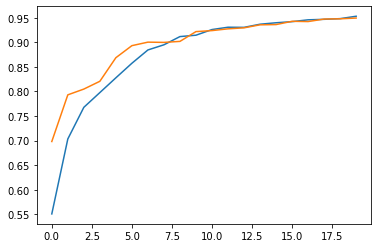

In [76]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

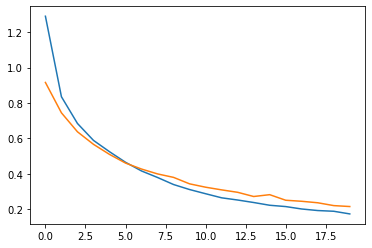

In [77]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])